In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score

df = pd.read_csv("C:/Users/sesa777393/Desktop/tareas/PIA_MIN_DAT/Data Cleaning/dataset_clean.csv")

In [5]:
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
corr_matrix = numeric_df.corr()
print("\n--- Correlation Matrix ---")
print(corr_matrix)



--- Correlation Matrix ---
                   usability  num_of_files  vote_counts  num_of_columns  \
usability           1.000000      0.018546     0.104036       -0.025392   
num_of_files        0.018546      1.000000     0.006653        0.017343   
vote_counts         0.104036      0.006653     1.000000       -0.002450   
num_of_columns     -0.025392      0.017343    -0.002450        1.000000   
views               0.053149     -0.003355     0.802228       -0.002777   
downloads           0.070111     -0.002266     0.952997       -0.005526   
download_per_view  -0.245701      0.031292     0.044778        0.035114   

                      views  downloads  download_per_view  
usability          0.053149   0.070111          -0.245701  
num_of_files      -0.003355  -0.002266           0.031292  
vote_counts        0.802228   0.952997           0.044778  
num_of_columns    -0.002777  -0.005526           0.035114  
views              1.000000   0.754434           0.008920  
downloads  

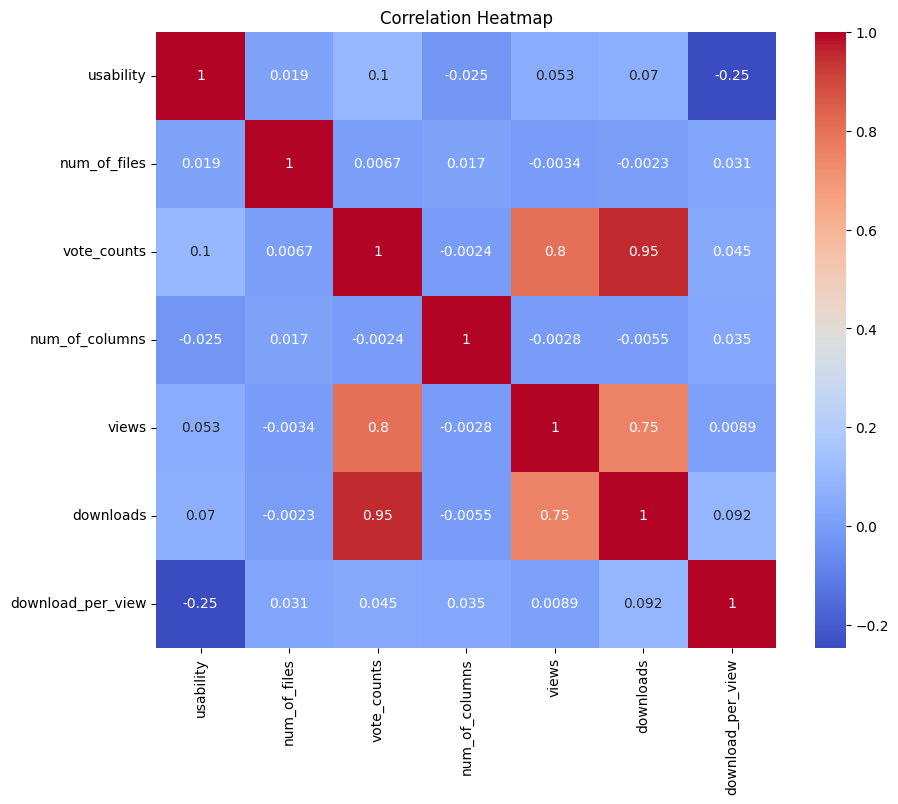

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
dependent_variable = 'downloads'
independent_variable = 'views'

X = df[independent_variable]  
y = df[dependent_variable]  

X = sm.add_constant(X)

In [8]:
model = sm.OLS(y, X).fit()
print("\n--- Linear Regression Model Summary ---")
print(model.summary())


--- Linear Regression Model Summary ---
                            OLS Regression Results                            
Dep. Variable:              downloads   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     3642.
Date:                Fri, 16 May 2025   Prob (F-statistic):               0.00
Time:                        12:06:41   Log-Likelihood:                -29325.
No. Observations:                2759   AIC:                         5.865e+04
Df Residuals:                    2757   BIC:                         5.867e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

In [9]:
r_squared = r2_score(y, model.predict(X))
print(f"\nR-squared: {r_squared}")


R-squared: 0.5691702303659534


Text(0, 0.5, 'downloads')

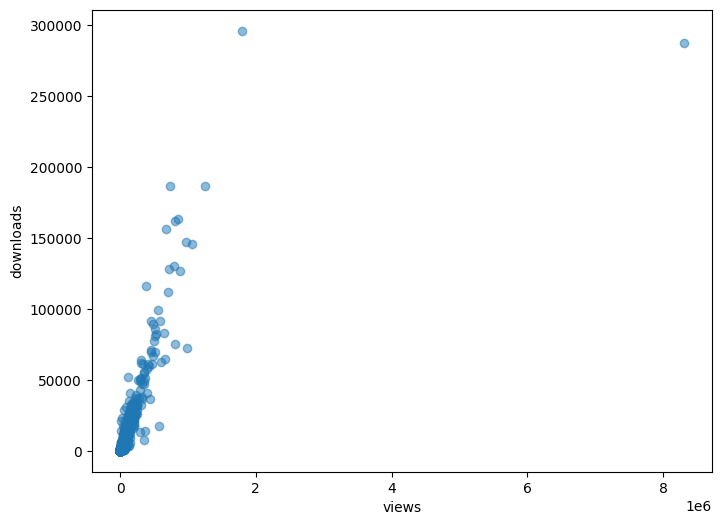

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(df[independent_variable], df[dependent_variable], alpha=0.5)
plt.xlabel(independent_variable)
plt.ylabel(dependent_variable)

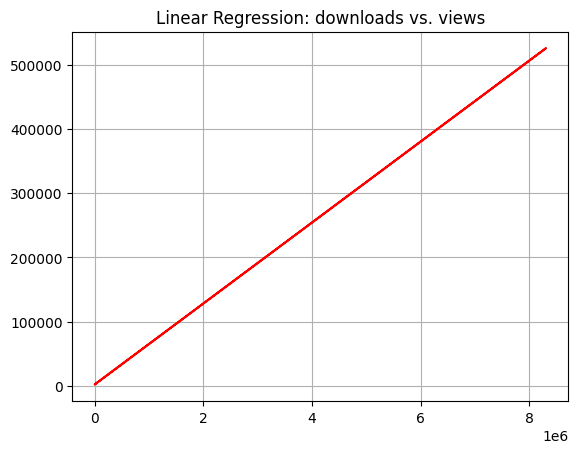

In [11]:
plt.plot(df[independent_variable], model.predict(X), color='red')
plt.title(f'Linear Regression: {dependent_variable} vs. {independent_variable}')
plt.grid(True)
plt.show()